## Question 1:

Consider the equation $x=1-e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This euqation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.
<br>
<br>
(a) Write a program to solve this equation for $x$ using the relaxation method for the case $c=2$. Calculate your solution to an accuracy of at least $10^{-6}$, where the error is calculated with Equation 6.83 in the textbook.
<br>
<br>
(b) Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01 and make a plot of $x$ as a function of $c$. You should see a clear transition from a regime in which $x=0$ to a regime of nonzero $x$. This is another example of phase transition. In physices this transition is known as the percolation transition; in epidemiology it is the epidemic threshold.

In [8]:
import numpy as np
import math

c=2

def f(x):
    return 1-math.exp(-c*x)
def fprime(x):
    return c*math.exp(-c*x)

#initial guess
x=0.5
target=1e-6
epsilonp=100
n=0
while abs(epsilonp)>target:
    xp=f(x)
    epsilonp=(x-xp)/(1-1/fprime(x))
    x=xp
    n+=1
    print(f'x_p = {xp}, epsilonp = {epsilonp}')

print(n," steps")



x_p = 0.6321205588285577, epsilonp = 0.36787944117144233
x_p = 0.7175464361494597, epsilonp = 0.110913531480565
x_p = 0.7619067492797049, epsilonp = 0.0403269147709922
x_p = 0.7821205821947897, epsilonp = 0.015610977805616532
x_p = 0.7907532631816485, epsilonp = 0.006212691499064951
x_p = 0.794334975085306, epsilonp = 0.002502702465751769
x_p = 0.7958029765851733, epsilonp = 0.0010133824213059658
x_p = 0.7964016204183796, epsilonp = 0.0004112086641607746
x_p = 0.7966452403764663, epsilonp = 0.00016700513365174664
x_p = 0.7967442987979305, epsilonp = 6.785029736454325e-05
x_p = 0.7967845631871013, epsilonp = 2.7569983241325462e-05
x_p = 0.7968009272190715, epsilonp = 1.1203321210770777e-05
x_p = 0.7968075774224933, epsilonp = 4.552683444438361e-06
x_p = 0.7968102799464087, epsilonp = 1.8500877999034894e-06
x_p = 0.7968113781935964, epsilonp = 7.518287668643491e-07
15  steps


C:\Users\ngaco\AppData\Local\Temp\ipykernel_20108\2792109764.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  epsilonp=(x-xp)/(1-1/fprime(x, c))


Text(0, 0.5, '$x$')

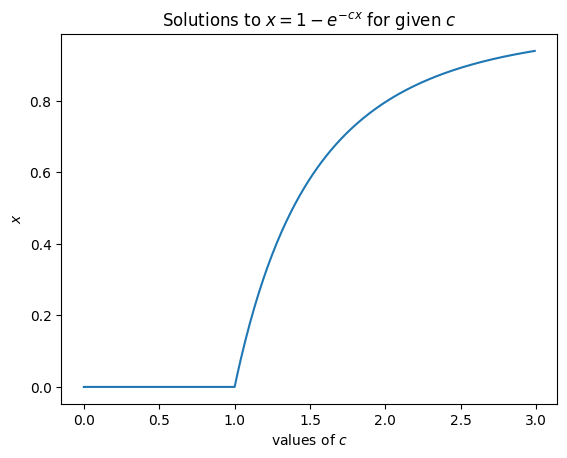

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(x, c):
    return 1-math.exp(-c*x)
def fprime(x, c):
    return c*math.exp(-c*x)

C = []
X = []

for c in np.arange(0, 3, 0.01):

    C.append(c)
    
    #initial guess
    x=0.5
    target=1e-6
    epsilonp=100
    n=0
    while abs(epsilonp)>target:
        xp=f(x, c)
        epsilonp=(x-xp)/(1-1/fprime(x, c))
        x=xp
        n+=1

    X.append(x)


plt.plot(C, X)
plt.title(r'Solutions to $x=1-e^{-cx}$ for given $c$')
plt.xlabel(r'values of $c$')
plt.ylabel(r'$x$')
    

# Question 2

Write a program, or modify the one from class where we solved Laplce's equation, to solve Poisson's equation for the system described below. Work in units where $\epsilon_0 =1$ and continue the iteration until your solution for the electric potential changes by less than $10^{-6}$ V per step at every grid point. Make a plot of the potential in the box as we did in class. As in class, we will consider a square box with side length of $1$ m. However, in this problem all walls of the box will be set to a potential difference of $0V$. There are two square regions of charge in the box with charge density $\pm \frac{C}{m^2}$. Box square regions are $20$ cm on a side and are located $20$ cm from the walls of the bounding box as shown in the figure below. Use $1$ cm grid spacing.
<br>
<br>
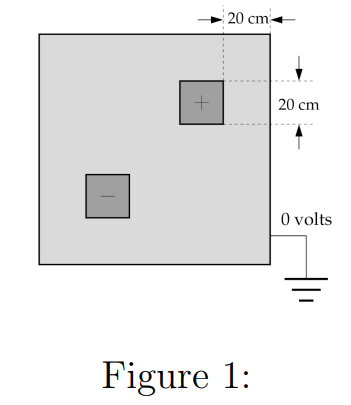

0.49999999971331
0.4999999920697626
0.49999989273405276
0.49999905344517015
0.4999938650296327
0.4999688205656776
0.49987043917726304
0.4995467415564079
0.4992203281949035
0.49858351826316216
0.49751188475423547
0.49631944759788205
0.4949831280406123
0.4932938633921591
0.4912418500085023
0.4888349482964012
0.48609336370228995
0.48304489922996474
0.479721438864825
0.4761564360480399
0.4728166970696037
0.46935589074315764
0.4657379053534214
0.46198358632850756
0.45811301811673566
0.4541451911508698
0.45009779811742767
0.4459871279916623
0.4418280317960601
0.43763393920849225
0.4334169097385363
0.4291877060864717
0.4249558804842959
0.4207298673462283
0.41651707751460165
0.41232399087352434
0.40815624521086136
0.40401872002023254
0.3999156145189353
0.39585051956915507
0.3918264834735474
0.3878460718054235
0.3839114215541457
0.3800242899378148
0.3761860982720151
0.37239797129582897
0.3686607723528148
0.36497513481040045
0.3613414900803811
0.35776009257865127
0.3542310419365151
0.35075430274

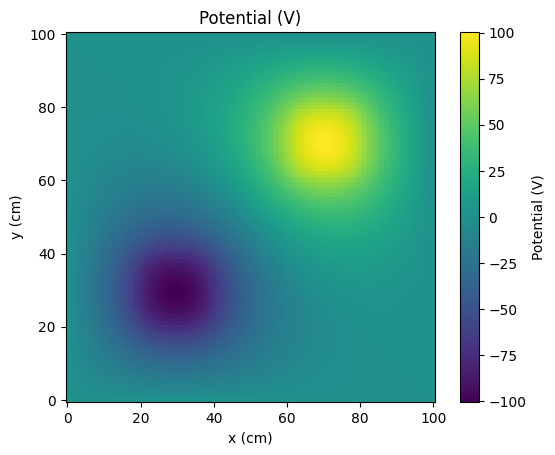

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

#constants
charge_density = 1
omega = 0.5

#number of grid points, 0-100 in increments of 1 is 101 points
n = 101

#make the grid
phi = np.zeros([n,n],float)
rho = np.zeros([n,n], float)
phinew = np.zeros([n,n],float)
#set the top edge (first row) to a fixed value of V
for i in range(20, 40):
    for j in range(n-40, n-20):
        rho[i][j] = charge_density
        rho[j][i] = -charge_density

#target accurancy
e=1e-6
#initialize diff
diff=100
EPSILON = 1

nsteps=0#count how many iterations until convergence
while diff>e:
    maxdiff=0#keep track of max difference this iteration
    for i in range(n):
        for j in range(n):
            if i==0 or i==n-1 or j==0 or j==n-1:# values on the boundary are fixed
                continue#don't do anything
            else:
                phinew = (phi[i+1][j] + phi[i-1][j] + phi[i][j+1]+phi[i][j-1] + 1/EPSILON * rho[i][j])/4
                if abs(phi[i][j]-phinew)>maxdiff:#if this is greater than current max difference
                    maxdiff=abs(phi[i][j]-phinew)#save it as max difference
                phi[i][j]=phinew#change phi[i][j]
    diff=maxdiff
    print(diff)
    nsteps+=1

print(nsteps,"steps")

#plot with a weighted 2D histogram
x=[]
y=[]
w=[]
for i in range(n):
    for j in range(n):
        x.append(j)#j=0 (left column) is equivalent to x=0
        y.append(100-i)#i=0 (top row) is equivalent to y=100
        w.append(phi[i][j])

b=np.arange(-0.5,101.5,1)#bin edges from -0.5 to 100.5, so there's one bin for every point on the grid
plt.hist2d(x,y,weights=w,bins=b)
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.title('Potential (V)')
plt.axis("square")
plt.xlim(-0.5,100.5)
plt.ylim(-0.5,100.5)
c = plt.colorbar()
c.set_label("Potential (V)")
plt.show()

